# Set parameters

In [1]:
IMG_SHAPE=(28, 28, 1)
Z_DIM = 100

# Make dataset

In [2]:
from data_generator import *

x_train = get_fashion_mnist()
x_train.shape

(60000, 28, 28, 1)

# Build models(encoder, decoder)

In [5]:
from build_models import *

builder = BuildModel( IMG_SHAPE
                    , Z_DIM
                    , n_conv_layers=2
                    , dense_dim=512)

encoder = builder.build_encoder()
decoder = builder.build_decoder()
encoder.summary()
decoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 14, 14, 32)   0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 7, 7, 32)     9248        leaky_re_lu_8[0][0]              
____________________________________________________________________________________________

# Build VAE 

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vae_inputs (InputLayer)      [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 1178152   
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         1128289   
Total params: 2,306,441
Trainable params: 2,306,441
Non-trainable params: 0
_________________________________________________________________


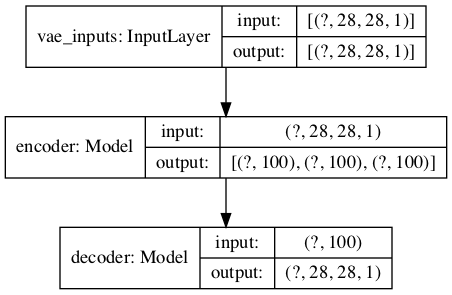

In [13]:
from vae import *

model = VAE(encoder, decoder, IMG_SHAPE)
model.compile()
model.vae.summary()
plot_model(model.vae, show_shapes=True)

# Train

* 1 / 5 : loss: 195388.656250, v_loss: 44352.101562


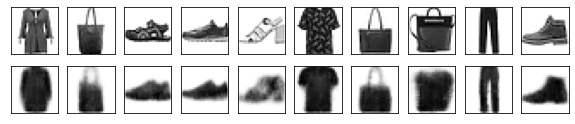

* 2 / 5 : loss: 174023.265625, v_loss: 43018.570312


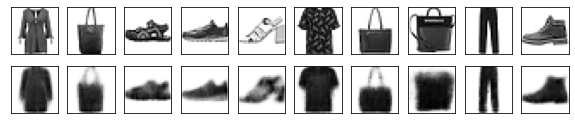

* 3 / 5 : loss: 169940.812500, v_loss: 42215.468750


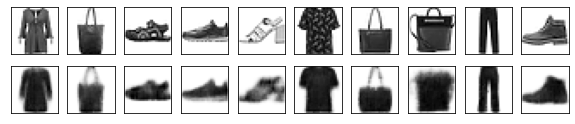

* 4 / 5 : loss: 167279.078125, v_loss: 41679.546875


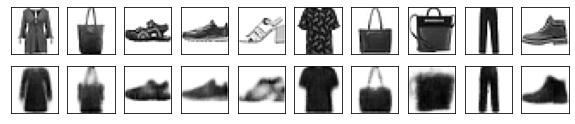

* 5 / 5 : loss: 165551.859375, v_loss: 41341.453125


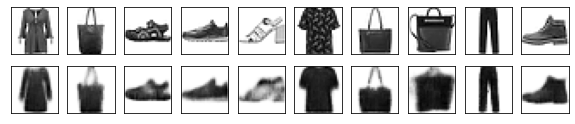

In [9]:
history = model.fit( x_train
                   , batch_size=64
                   , epochs=5
                   , valid_split=0.2
                   , img_iter=1 )